In [1]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2022, day=14)

def parses(input):
    return [[parse.parse('{:d},{:d}', pair).fixed for pair in line.split(' -> ')]
            for line in input.strip().split('\n')]
        
data = parses(puzzle.input_data)

In [2]:
def make_cave(data):
    cave = np.zeros((1000,1000), dtype=np.uint8)
    for instructions in data:
        for (x1, y1), (x2, y2) in zip(instructions, instructions[1:]):
            if x1 == x2:
                cave[x1,min(y1,y2):max(y1,y2)+1] = 1
            elif y1 == y2:
                cave[min(x1,x2):max(x1,x2)+1, y1] = 1
            else:
                raise ValueError
    return cave

In [3]:
sample = parses("""498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9
""")

In [4]:
def visualize(cave):
    ys = cave.sum(0) > 0
    xs = cave.sum(1) > 0
    cave = cave[xs,:][:,ys]
    cave_char = np.choose(cave, ' █o').T
    print('\n'.join([''.join(row) for row in cave_char]))

In [5]:
def visualize(cave, r=10):
    import PIL.Image
    ys = cave.sum(0) > 0
    xs = cave.sum(1) > 0
    cave = cave[xs,:][:,ys]
    im = PIL.Image.fromarray(cave.T*127)
    w, h = im.size
    return im.resize((w*r,h*r), PIL.Image.NEAREST)

In [6]:
from numba import njit

In [21]:
@njit
def simulate_sand(cave):
    EMPTY, ROCK, SAND = 0, 1, 2
    SRC = (500,0)
    i = 0
    while cave[SRC] == 0:
        x, y = np.array(SRC)
        while cave[x,y] == EMPTY:
            i += 1
            if y+1 >= cave.shape[1]:
                return (cave==SAND).sum()
            for x2, y2 in [(x,y+1), (x-1,y+1), (x+1,y+1)]:
                if cave[x2,y2] == EMPTY:
                    x, y = x2, y2
                    break
            else:
                break
        cave[x,y] = SAND
    return (cave==SAND).sum()

In [22]:
def solve_a(data):
    cave = make_cave(data)
    return simulate_sand(cave)

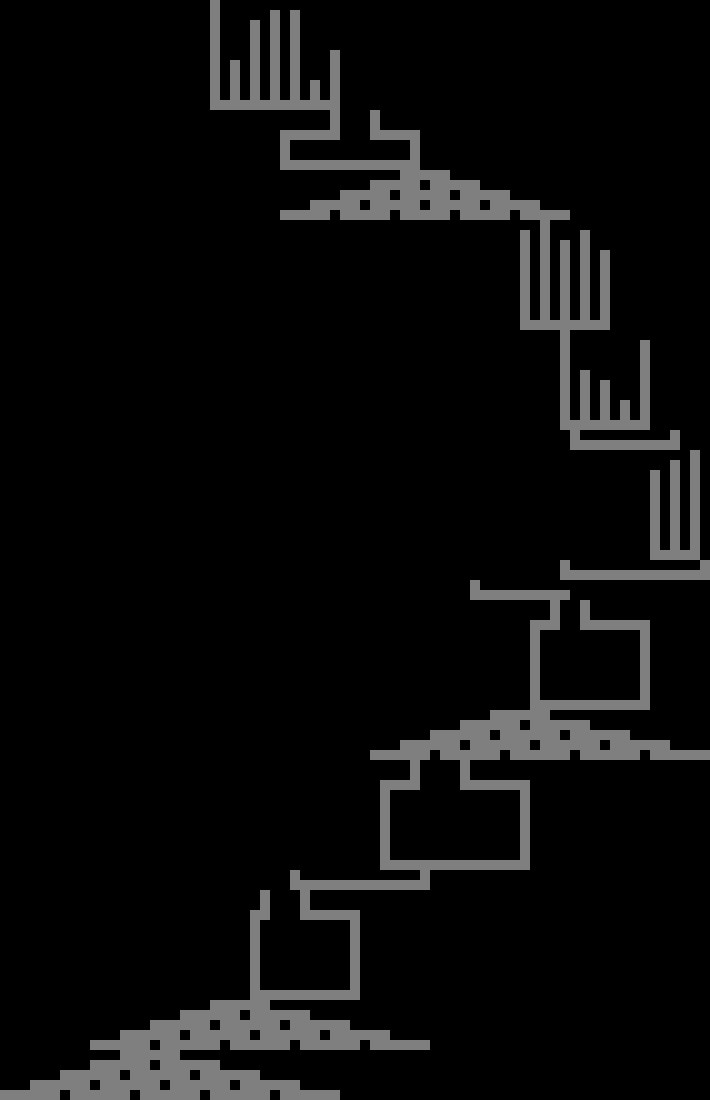

In [15]:
visualize(make_cave(data))

In [23]:
solve_a(sample)

24

In [24]:
solve_a(data)

755

In [25]:
def solve_b(data):
    cave = make_cave(data)
    bottom = 2 + max(y for pairs in data for _, y in pairs)
    cave[:,bottom] = 1
    return simulate_sand(cave)

In [26]:
solve_b(sample)

93

In [27]:
%%time
solve_b(data)

CPU times: user 29.6 ms, sys: 1.41 ms, total: 31 ms
Wall time: 33.7 ms


29805

In [85]:
@njit
def simulate_sand_all(cave):
    all_frames = []
    EMPTY, ROCK, SAND = 0, 1, 2
    SRC = (500,0)
    bottom = np.where(cave)[1].max()
    while cave[SRC] == 0:
        x, y = np.array(SRC)
        while cave[x,y] == EMPTY:
            cave[x,y] = SAND
            all_frames.append(cave.copy().T)
            cave[x,y] = EMPTY
            if y+1 > bottom:
                return all_frames
            for x2, y2 in [(x,y+1), (x-1,y+1), (x+1,y+1)]:
                if cave[x2,y2] == EMPTY:
                    x, y = x2, y2
                    break
            else:
                break
        cave[x,y] = SAND
    return all_frames

In [86]:
frames = np.stack(simulate_sand_all(make_cave(sample)))

In [90]:
frames.shape

(171, 10, 11)

In [91]:
xs = frames.sum(axis=(0,2)) > 0
ys = frames.sum(axis=(0,1)) > 0
frames = frames[:,xs,:][:,:,ys]

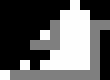

In [92]:
visualize(frames[-1].T)

In [102]:
%matplotlib inline

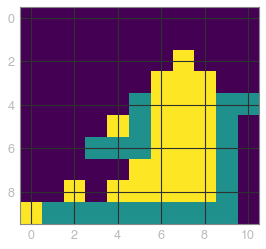

In [103]:
import matplotlib.animation as animation

fig, ax = plt.subplots()
plt.grid(False)

ims = []
for i, f in enumerate(frames):
    im = ax.imshow(f, animated=True)
    if i == 0:
        ax.imshow(f)
    ims.append([im])

In [104]:
ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True,
                                repeat_delay=1000)

In [105]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
frames = np.stack(simulate_sand_all(make_cave(data)))